# Vigenere Cipher (Bahasa Minangkabau)

## Bahasa 

Dalam kasus ini akan digunakan bahasa minangkabau sebagai bahasa yang digunakan. Adapun artikel yang digunakan untuk menentukan tabel kemunculan huruf pada bahasa tersebut adalah buku "Kaba Minangkabau karya Jamil Bakar dkk". Buku ini berisikan kumpulan sastra dalam bahasa minangkabau. Berikut merupakan tampilan dari buku tersebut

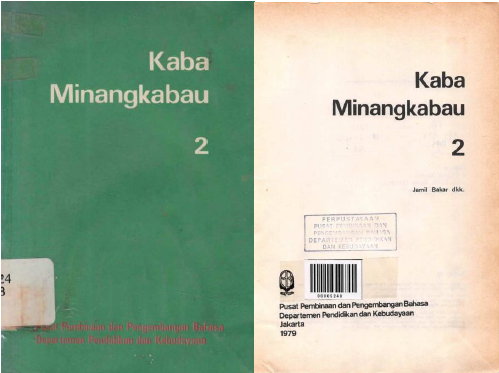

## Tabel

Untuk dapat melakukan kriptanalisis sandi vigenere, perlu ditentukan terlebih dahulu tabel peluangnya. Tabel peluang di sini adalah peluang kemunculan suatu huruf dalam bahasa yang dijadikan acuan. Untuk itu, dilakukan proses pencarian guna memperoleh tabel peluang. Digunakan buku kaba minangkabau sebagai referensi Buku bahasa Minangkabau dan berhasil disortir 184213 huruf yang dijadikan acuan dalam membuat tabel peluang. Adapun rincian kemunculannya sebagai berikut :

| Huruf | Kemunculan | Huruf | Kemunculan |
| :-: | :-: | :-:| :-: |
| **A** | 7420 | **N** | 3070 |
| **B** | 1172 | **O** | 1406 |
| **C** | 112  | **P** | 693  |
| **D** | 1200 | **Q** | 4    |
| **E** | 661  | **R** | 941  |
| **F** | 2    | **S** | 781  |
| **G** | 1764 | **T** | 1209 |
| **H** | 612  | **U** | 1684 |
| **I** | 2075 | **V** | 2    |
| **J** | 436  | **W** | 75   |
| **K** | 2334 | **X** | 6    |
| **L** | 1155 | **Y** | 325  |
| **M** | 1239 | **Z** | 4    |

Dan dengan membagi tiap kemunculan huruf dengan total huruf yang dijadikan acuan, diperoleh tabel peluangnya dengan menghitung $p_{i} = \frac{f_i}{\sum_{i = 0}^{25} f_i}$ dengan $i = 0,1,...,25$ dan $p_i$ menyatakan peluang huruf ke-$i$ dan $f_i$ menyatakan banyaknya kemunculan huruf ke-$i$. Diperoleh tabel peluang sebagai berikut :

| Huruf | Peluang | Huruf | Peluang | Huruf | Peluang |
| :-: | :-: | :-:| :-: | :-:| :-: |
| **A** | 0.24422355341978802000 | **J** | 0.01435060233032716700 | **S** | 0.02570601013758146000 |
| **B** | 0.03857547231913633000 | **K** | 0.07682180238298993000 | **T** | 0.03979329866368244000 |
| **C** | 0.00368639325916661200 | **L** | 0.03801593048515568000 | **U** | 0.05542755578961227000 |
| **D** | 0.03949707063392798000 | **M** | 0.04078072542953064400 | **V** | 0.00006582845105654664 |
| **E** | 0.02175630307418866300 | **N** | 0.10104667237179910000 | **W** | 0.00246856691462049900 |
| **F** | 0.00006582845105654664 | **O** | 0.04627740109275229000 | **X** | 0.00019748535316963992 |
| **G** | 0.05806069383187413600 | **P** | 0.02280955829109341000 | **Y** | 0.01069712329668882900 |
| **H** | 0.02014350602330327000 | **Q** | 0.00013165690211309328 | **Z** | 0.00013165690211309328 |
| **I** | 0.06829701797116713000 | **R** | 0.03097228622210519400 | |


## Syntax

In [1]:
import numpy as np
import pandas as pd

In [2]:
idx = []
alphabet = []
for i, char in enumerate('abcdefghijklmnopqrstuvwxyz'):
    idx.append(i)
    alphabet.append(char)
    
alpha2num = dict(zip(alphabet, idx))
num2alpha = dict(zip(idx, alphabet))

In [3]:
# letter prob minang

probability = {"A": 0.24422355341978802000, "B": 0.03857547231913633000, "C": 0.00368639325916661200, 
               "D": 0.03949707063392798000, "E": 0.02175630307418866300, "F": 0.00006582845105654664, 
               "G": 0.05806069383187413600, "H": 0.02014350602330327000, "I": 0.06829701797116713000, 
               "J": 0.01435060233032716700, "K": 0.07682180238298993000, "L": 0.03801593048515568000,
               "M": 0.04078072542953064400, "N": 0.10104667237179910000, "O": 0.04627740109275229000,
               "P": 0.02280955829109341000, "Q": 0.00013165690211309328, "R": 0.03097228622210519400, 
               "S": 0.02570601013758146000, "T": 0.03979329866368244000, "U": 0.05542755578961227000,
               "V": 0.00006582845105654664, "W": 0.00246856691462049900, "X": 0.00019748535316963992, 
               "Y": 0.01069712329668882900, "Z": 0.00013165690211309328}

In [4]:
def findgcd(x, y):
   while(y):
      x, y = y, x % y
   return x

In [5]:
def TesKasiski(text, n_partisi):
    list_n_partisi = []
    item_count = []
    dict_item = {}
    
    for i in range(len(text) - n_partisi+1):
        list_n_partisi.append(text[i:n_partisi+i])
        
    unique_item = set(list_n_partisi)
    
    for item in unique_item:
        if list_n_partisi.count(item)>=2:
            dict_item[item] = list_n_partisi.count(item)
    
    for item in dict_item:
        print(item)
        for j in range(len(text)):
            if text[j:j+n_partisi] == str(item):
                print("Posisi = ",j)

    best_pos = []
    best_item = max(dict_item, key = dict_item.get)
    for j in range(len(text)):
      if text[j:j+n_partisi] == str(best_item):
        best_pos.append(j)

    d = [y - x for x,y in zip(best_pos,best_pos[1:])]
    if len(d) <= 1:
      gcd = d[0]
    else:
      num1 = d[0]
      num2 = d[1]
      gcd = findgcd(num1,num2)
      for i in range(2,len(d)):
        gcd = findgcd(gcd,d[i])

    print()
    print("Segmen kata identik adalah = ",best_item)
    print("GCD = ",gcd)
    print("Posisi = ",d)

In [6]:
def text_arrangement(ciphertext, m):
    n_cols = int(np.ceil(len(ciphertext)/m))
    res = m - (len(ciphertext) % m)
    pad = ' '*res
    ciphertext += pad
    
    substring = []
    for i in range(n_cols):
        substring.append(list(ciphertext[i*m:(i*m)+m]))
        
    return np.array(substring)

In [7]:
def idxc(ciphertext):
    ciphertext = ciphertext.upper()
    freq = [ciphertext.count(x) for x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ']
    n = len(ciphertext)
    sumf = 0
    
    for i in range(26):
        sumf += freq[i]*(freq[i]-1)
        
    return sumf/(n*(n-1)) 

In [8]:
def avg_idxc(matrix):
    m = matrix.shape[1]
    sumx = 0
    
    for i in range(m):
        x = "".join(matrix[:,i]).strip()
        sumx += idxc(x)

    return sumx / m

In [9]:
def mutual_idxc(x, g):
    x = x.upper()
    n = len(x)
    freq = [x.count(alphabet) for alphabet in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ']
    freqsum = 0

    for i, char in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
        freqsum += probability[char] * freq[(i+g)%26]

    return freqsum / n

In [10]:
def best_m(ciphertext, p2, max_len):
    avg_idxc_list = []
    best_m = 1
    min_score = 99
    
    for i in range(1, max_len+1):
        segment = text_arrangement(ciphertext, i)
        avg_idxc_list.append(avg_idxc(segment))
    
    best_m = np.argmin(abs(p2-np.array(avg_idxc_list)))
    for i, score in enumerate(avg_idxc_list):
         print(i+1, score)
    
    print('m: ', best_m + 1, 'avg_idxc: ', avg_idxc_list[best_m])        
    return best_m + 1

In [11]:
def decrypt_vigenere(C, K):
    K = K.lower()
    C = C.lower()
    P = ''

    len_C = len(C)
    len_K = len(K)
    

    for i in range(len_C):
        j = i % len_K
        P += num2alpha[(alpha2num[C[i]] - alpha2num[K[j]]) % 26] 
        
    return P

In [12]:
def encrypt_vigenere(P, K):
    P = P.lower()
    K = K.lower()
    C = ''

    len_P = len(P)
    len_K = len(K)
    

    for i in range(len_P):
        j = i % len_K
        C += num2alpha[(alpha2num[P[i]] + alpha2num[K[j]]) % 26] 
        
    return C.upper() 

In [13]:
def best_key(ciphertext, p2, m):
    len_key = m
    substring_matrix = text_arrangement(ciphertext, len_key)
    mic_table = np.zeros((len_key, 26))
    for i in range(len_key):
        subtext = "".join(substring_matrix[:,i]).strip()
        for g in range(26):
            mic_table[i, g] =  mutual_idxc(subtext, g)

    idx_key = []
    for i in range(len_key):
        idx_key.append(np.argmin(abs(p2-mic_table[i])))
    key = "".join([num2alpha[x] for x in idx_key])
    return key.upper(), pd.DataFrame(mic_table)

In [14]:
def find_key(ciphertext, p2, len_key_max):
    m = best_m(ciphertext, p2, len_key_max)
    key,mutual_idxc = best_key(ciphertext, p2, m)
    return key,mutual_idxc

## Contoh 1

In [15]:
plaintext1 = "anakalangtabangmalayangditangkokanakkamulaumulocuritokamikambangnaksanangatimandangalahramipasapadangramimanjalangsanjorayoalurancuritokamikambangkajadiandalamdaerahkitokaditabangtalangrangbubuihnyosakadamadisubarangadobulanadotauntaktasabuikisinyosajokitopagangnankambangabihbubuihsikamulautenggerananakburuangalangdalamdaerahkotoanaukasinanmahpalmangarangkaditabangtalangdiparaknyosakabatanglimaulunggoyorangbatigobadunsanaklaibanamokatigonyobuahpulolahasamcaminditabanganaksawahlurahmaraokjatuahatehmunggunanbatuobanamoajikarimtanmudogalanantangahgadihbanamoupiakbonsukaparakburuangalangtenggerananakburuangbondoanakrangsumarakkotopiliangpamenanbodiganiagonanbarabahjoasamcaminditabangtalangatehmunggu"
plaintext1 = plaintext1.lower()
K1 = "minang"
ciphertext1 = encrypt_vigenere(plaintext1,K1)

In [16]:
print(ciphertext1)

MVNKNRMVTTNHMVTMNRMGNNTJUBNNTQASNNNQWIZUYGGUHLBIGZVTBQMUVKNSNIAGAGWANNNTSIGIZGZLNNTGXIURNSUXNSNVMLNNTXMUVMNTVIYAAMEIAJBXMGBAYADIACHXUBBKNSUSNMOGZOXAWGPQNNQGXIZDNKDIUKVZASNDVZMJNNTZMTNNTXMVTBHHGQUNLUEIXAQGYIQIFANIEAAMMLBBHRMVNDBZMCATNQFIFAOAUSVSVTKWFAWUWQGOCGSIAGAGZSNMOGZONBVNNCOUVNEQXAZAXIHTRTSORRNTMVNKOADCNNTGXIAGQGXIZDNKDIUKBZAIAAHQMAVNNTYIUPNRYIAGNXMVTKNJUBNBNTSBNLNTSLVPNXMSAYBYMSNBNZMVTLVSMCYUAMSWLOEGZOOAGOSWOAQAZANNNQXIVBNTMUBKNZUOBNLUNCNHCAXWYAUGEIZCNSUVQIGGNIAGNTMSFAJGTTHRNNYIEABQVIGUNNMBRHZAZOTUAGZJNTHUNIAAZUMRVKNXUUGAASGLBGNRMVNNGGZONHTGPQUBNTMUBUCOMSOOAYGSNPNXMSOUEAMVTAYGZOGEAMSMEAAGZIXBHXGIAGOUZLBAAGWZNNTYGUNRNQWWGOCOXQNNTVMURNNTNWQITGZQNGBTMVOAEGNIUJBGEIZCNSUVQIGGNIAGGGXIAGNZQPZUAMSC


In [17]:
TesKasiski(ciphertext1,n_partisi=3)

LNN
Posisi =  79
Posisi =  97
XIZ
Posisi =  156
Posisi =  318
XMS
Posisi =  377
Posisi =  575
NLU
Posisi =  195
Posisi =  441
DIU
Posisi =  162
Posisi =  324
MUV
Posisi =  54
Posisi =  102
GOC
Posisi =  254
Posisi =  632
ZDN
Posisi =  158
Posisi =  320
GGN
Posisi =  466
Posisi =  682
IZC
Posisi =  457
Posisi =  673
TMV
Posisi =  299
Posisi =  659
AGZ
Posisi =  262
Posisi =  508
Posisi =  598
EAA
Posisi =  212
Posisi =  596
AZA
Posisi =  285
Posisi =  419
NRM
Posisi =  4
Posisi =  16
Posisi =  538
NSU
Posisi =  88
Posisi =  136
Posisi =  460
Posisi =  676
IGG
Posisi =  465
Posisi =  681
MVN
Posisi =  0
Posisi =  222
Posisi =  300
Posisi =  540
UVQ
Posisi =  462
Posisi =  678
GNI
Posisi =  467
Posisi =  665
Posisi =  683
MUB
Posisi =  432
Posisi =  558
TGX
Posisi =  82
Posisi =  310
MOG
Posisi =  141
Posisi =  267
AGO
Posisi =  411
Posisi =  608
AAM
Posisi =  111
Posisi =  213
VNK
Posisi =  1
Posisi =  301
PNX
Posisi =  375
Posisi =  573
JUB
Posisi =  23
Posisi =  359
ANN
Posisi =  67
Po

In [18]:
Key1, MIc1 = find_key(ciphertext1,0.10010596166260381, 10)

1 0.05999450407345144
2 0.07142741517741517
3 0.07325134677887851
4 0.0711525974025974
5 0.058658240580787654
6 0.10750406703065968
7 0.05954452588115955
8 0.07050026123301985
9 0.07386284601474476
10 0.06931851981453942
m:  6 avg_idxc:  0.10750406703065968


In [19]:
print(Key1)

MINANG


In [20]:
MIc1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.039213,0.024777,0.035362,0.034751,0.042329,0.037787,0.050617,0.024714,0.026720,0.030811,...,0.021120,0.027828,0.048753,0.041535,0.044070,0.027232,0.031609,0.033651,0.039589,0.066214
1,0.041203,0.044263,0.047070,0.024636,0.026939,0.034029,0.029612,0.036551,0.109540,0.026114,...,0.034930,0.030424,0.040365,0.024352,0.047851,0.066111,0.038845,0.024569,0.040379,0.024500
2,0.072174,0.045551,0.024155,0.037593,0.026936,0.039072,0.047002,0.047929,0.026448,0.025885,...,0.031149,0.029400,0.024355,0.051554,0.048860,0.037831,0.025357,0.026406,0.026241,0.041023
3,0.087730,0.041341,0.036103,0.036428,0.023890,0.028152,0.051498,0.045828,0.031343,0.032347,...,0.033102,0.031839,0.032918,0.048671,0.049427,0.026804,0.029125,0.029738,0.030710,0.033263
4,0.071728,0.050162,0.032971,0.038466,0.025430,0.037167,0.044131,0.050880,0.025044,0.029356,...,0.031850,0.021350,0.025463,0.060037,0.039523,0.036100,0.031106,0.017619,0.027767,0.042388
5,0.051986,0.018402,0.023336,0.032119,0.025739,0.037063,0.098440,0.030444,0.031568,0.030372,...,0.037060,0.033255,0.043493,0.066147,0.038237,0.023343,0.035574,0.037897,0.037459,0.046853


## Contoh 2

In [21]:
plaintext2= "alurankakakajikarimdisuruahduduakmasoitukapakankapanjalinanarimanjalangsanjorayogilojokajisiangmalamnaujopekahjokajijoburuangnuritabanglahkarimbonyosakabatanglimaulunggobukantoajidisurausajolaiajobatinnannyopakayoasamcamindidaiampaditenggerananakburuangbondolaijobatinkatokamicapekkakiringantanganpandaipulokarimbobatanampalamarimenjalangpukuasatubarakasanangperatianawakkankayomasoituanakalangtabangmelayanginggokdirantianglimaupuruiksawahjoladangtaktabilangkabaujobantiangtaktasabuikbuahpaloditapialamannanditabangsawahlurahbiusakrangadujoparampuanupiakbanmosirapiahkarimbobatanamtabuarimanjalangtangaharilamojolambekndehmasoituadowakatualangari"
plaintext2= plaintext2.lower()
K2 = "kriptografi"
ciphertext2 = encrypt_vigenere(plaintext2, K2)

In [22]:
print(ciphertext2)

KCCGTBQRKFSKAQZTFODDNAEICPARAUUFSWRADBHABAUIURVZTDGEJFTSEICTFODASRKCICZGGEJTZKPWVBZUAOPITZAXTBMDAQIWEIJCCVVKFPTFSPCWPFBZZERVVGIXZTFJKEOATVQRRNULFVNHGGBAGIDRVVEWSRUQCXXODUIQRNYWKAQSBGAIAZAKAWATWGAOGIDZVCTBTPOUIURGDTGGDCFUSELXWOORMUINZBTGUMVRFVKEIZUIXLASOLFVSHZGZJTJKKQCDOZFKFUSTIEXYQRKNZSEOPGHGEGFVZRVSTWVLLTSKIQBUCHRTFVKDXPEOSRRNUOERPEOTXPZSERAPMIHRRFSKJICTBMGEWIDZICTKGBKFVURGDFOYFIYCKEIZTZGEGYILRVVFSRRYFVQZVVZCQUIWIXKQPGURZMFCZLZJBYYRWFPTFTPWOTXTFSDRJXEOTXKFJKLRDUOTKIFVQKIZMOYRBZQUSCPADGCOIQDRXXTZGDASVKELXMOHRNLAKNIWEIXRHGQEJIZKOTXAICTFXPKOSGUFVEGQPDPGEMTASIIEBONBAWQWSWQTHGEARBKSCPKWSRNOIVRVVMOTXAMIBZTPFCPFLFULVSCWSNDAXWSKCPWCCRKFBERTPGUGII


In [23]:
TesKasiski(ciphertext2,n_partisi=3)

GEJ
Posisi =  50
Posisi =  72
RVV
Posisi =  122
Posisi =  155
Posisi =  397
Posisi =  595
IUR
Posisi =  43
Posisi =  208
FUS
Posisi =  218
Posisi =  273
CTF
Posisi =  58
Posisi =  538
RRN
Posisi =  139
Posisi =  326
ELX
Posisi =  221
Posisi =  507
SRR
Posisi =  325
Posisi =  401
IDZ
Posisi =  197
Posisi =  362
WSR
Posisi =  159
Posisi =  588
URG
Posisi =  209
Posisi =  374
PEO
Posisi =  322
Posisi =  333
FJK
Posisi =  130
Posisi =  460
OTX
Posisi =  335
Posisi =  445
Posisi =  456
Posisi =  533
Posisi =  599
PTF
Posisi =  109
Posisi =  439
ICT
Posisi =  57
Posisi =  354
Posisi =  365
Posisi =  537
TZG
Posisi =  389
Posisi =  499
TBM
Posisi =  92
Posisi =  356
TFS
Posisi =  110
Posisi =  448
FVQ
Posisi =  405
Posisi =  471
CTB
Posisi =  201
Posisi =  355
FPT
Posisi =  108
Posisi =  438
HGE
Posisi =  291
Posisi =  577
TFO
Posisi =  15
Posisi =  59
RKF
Posisi =  7
Posisi =  634
CPA
Posisi =  24
Posisi =  486
EIZ
Posisi =  243
Posisi =  386
GID
Posisi =  152
Posisi =  196
RNU
Posisi =  140

In [24]:
Key2,MIc2 = find_key(ciphertext2, 0.10010596166260381, 15)

1 0.042616314401787724
2 0.04228554715385603
3 0.04237726098191214
4 0.042550417912736754
5 0.04282461240310077
6 0.042151317837557774
7 0.04259021550145574
8 0.04116756524456946
9 0.04040042725488735
10 0.04206883394383394
11 0.0991296582671279
12 0.04257601820494902
13 0.040688121402407115
14 0.04282777557523163
15 0.042538340212758825
m:  11 avg_idxc:  0.0991296582671279


In [25]:
print(Key2)

KRIPTOGRAFI


In [26]:
MIc2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.042635,0.029968,0.034560,0.049457,0.055318,0.026894,0.028409,0.032138,0.027015,0.034205,...,0.047003,0.041813,0.048285,0.047111,0.033042,0.023642,0.042430,0.050246,0.034109,0.034355
1,0.038900,0.021747,0.031117,0.031651,0.073902,0.049723,0.029397,0.033602,0.032380,0.035034,...,0.033576,0.093812,0.042262,0.031736,0.027922,0.027970,0.031777,0.041225,0.040460,0.050707
2,0.037235,0.034800,0.053319,0.028652,0.029058,0.027340,0.037945,0.029515,0.094792,0.032846,...,0.046968,0.032239,0.033299,0.029868,0.033493,0.071900,0.041523,0.034790,0.031800,0.026117
3,0.024499,0.034477,0.066448,0.047627,0.030014,0.037979,0.026102,0.031573,0.036674,0.046487,...,0.028760,0.033305,0.037855,0.027568,0.024316,0.054599,0.039526,0.038363,0.023447,0.041151
4,0.041183,0.041510,0.036191,0.024589,0.040587,0.035499,0.060645,0.036634,0.025921,0.041354,...,0.036043,0.031468,0.037994,0.098982,0.041064,0.027050,0.039398,0.025752,0.023861,0.042030
5,0.032484,0.055110,0.049465,0.030093,0.034066,0.032694,0.044221,0.039751,0.055674,0.022913,...,0.027569,0.029604,0.031846,0.031048,0.048401,0.044823,0.048381,0.026064,0.032807,0.036825
6,0.044930,0.023608,0.030838,0.033094,0.030964,0.037627,0.098034,0.036319,0.031336,0.027209,...,0.038936,0.025136,0.046612,0.063823,0.033921,0.030005,0.033859,0.033288,0.042095,0.036299
7,0.034755,0.031416,0.025970,0.053726,0.062750,0.040583,0.029359,0.037126,0.027371,0.036173,...,0.037859,0.105157,0.025345,0.034766,0.033335,0.034309,0.023574,0.057175,0.032863,0.031963
8,0.088054,0.034808,0.037051,0.027867,0.034123,0.021663,0.044633,0.041199,0.039373,0.042775,...,0.039710,0.038773,0.031456,0.039574,0.043611,0.026179,0.033084,0.038346,0.032600,0.035232
9,0.023073,0.022924,0.032538,0.021722,0.031412,0.118951,0.036014,0.027497,0.027692,0.021248,...,0.030395,0.035583,0.062050,0.051236,0.037433,0.043618,0.033056,0.037938,0.038544,0.053031
